# Worksheet 02

Name:  Lili Zhao
UID: U18256657

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

A drawback of the top down approach is that in certain languages, like python, you cannot run your code until you have completely runnable code (which could cause problems with pseudocode fill ins that would be implemented later). This means that it can be hard to debug after.

b) What is a drawback of the bottom up approach?

A drawback of the bottom up approach is that it is sometimes hard to plan which could lead to wasted time implementing functions you find out are unneeded later.

c) What are 3 things you can do to have a better debugging experience?

- Don’t panic, keep calm, and don’t find quick fix
- Read error
    - what where? is it cause or symptom (another bug under?)
- Re-read code
    - can you mentally trace to reproduce where bug appeared?
        - if no, may have to refactor
- Sanity check
    - minimize debugging space
    - is everything set up right? communicating right?
- Look online/ Get help
    - don’t debug for more than an hour, come back to it later :)

d) (Optional) Follow along with the live coding. You can write your code here:

In [69]:
#8 Queen puzzle- such that no 2 can capture each other
#1. create interface for board (what classes do we need) and print to command line
#2. populate board with queens
#3. find at least one solution
#4. find all solutions

class Board:
    def __init__(self): #maybe can do N-Queen later
        #define attributes to board
        self.board = [["-" for _ in range(8)] for _ in range(8)]
    def __repr__(self):
        res = ""
        # for row in range(len(self.board)):
        #     for col in range(len(self.board)):
        # or
        for row in range(8):
            for col in range(8):
                res += self.board[row][col]
                res += " "
            res += "\n"
        return res
    
    def set_queen_at(self, row, col):
        self.board[row][col] = "Q"
    def unset_queen_on_row(self, row):
        #assuming no other Q on row bc of nature of Q puzzle
        self.board[row] = ["-" for _ in range(8)]

    def find_solution(self):
        #assuming top down left to right 
        row = 0
        col = 0

        while row < 8: #still looking for solution
            if self.is_valid_move(row, col):
                self.set_queen_at(row, col)
                row += 1 #based on rules we know that 
                col = 0
            else:
                col += 1
                if col >= 8: #out of bounds
                    #no solution able to be found/place queen on this row
                    #we need to backtrack and adjust position on previous row
                    col = self.get_queen_on_row(row - 1)
                    col += 1  # we need to look at everything after this position (we know it is valid move)
                    row -= 1
        print("Found a solution.")
        print(self)


test = Board()
print(test)

- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 



## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [91]:
%pip install pandas
%pip install matplotlib

import pandas as pd

df = pd.read_csv("train.csv") # your code here
df.describe()

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [95]:
#print("there are " +  str((df.isnull().sum() > 0).sum()) + " rows with at least one empty value")

#print(len(df))

print("there are " +  str(len(df) - len(df.dropna())) + " rows with at least one empty value")

891
there are 179 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [94]:
#print([c for c in df if df[c].isnull().sum() > 200])
df = df.drop(columns= [c for c in df if df[c].isnull().sum() > 200])
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [51]:
# df['Sex'] = df['Sex'].replace("male", 0)
# df['Sex'] = df['Sex'].replace("female", 1)
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()
#df[df['Sex'] == 'male']
#df[df['Sex'] == 'female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [88]:
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df['Name'].str.split(' \(', expand=True)[0].str.replace(',', '').str.replace('.', '').str.split(' ', expand=True)[[2, 3, 0, 1]]
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,James,None,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Oscar,W,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nicholas,None,Nasser,Mrs


f) Complete the code below to replace all missing ages with the average age

In [59]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

<Axes: xlabel='Survived'>

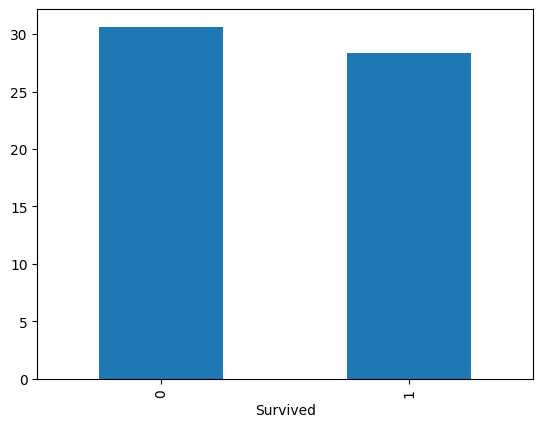

In [64]:
import matplotlib.pyplot as plt
df.groupby('Survived')['Age'].mean().plot(kind='bar')

#Observation: On average, the people who survived were slightly younger than those who did not. 
# I suppose that makes sense, due to the "women and children" priority for lifeboats 
# (according to a quick Google search women were generally a bit younger than men).